$$ E  = \frac{1}{N} \sum_{n=0}^{N-1} |S[n]|^2 $$
$$ \sigma _w^2  = \frac{1}{N} \sum_{n=0}^{N-1} |S[n]|^2 $$

In [ ]:

import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq	# FFT and helper functions
import numpy as np


sample_rate, samples = wavfile.read('/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Wav_files/Cargo/014907.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)


Win_length = 50 #Seconds used for normalisation
win_dist = 100 #seconds between each window
fs = 3200 #Sample frequency of signal

Num_samples = Win_length * fs



def Normalization_BroadBand(x,window_length, window_distance, sample_rate):
    #TODO
    #Legg in error melding for når winduene er utenfor sample array

    #Tar utgangspunkt i at x[0] er det nyeste sample
    """Plot spectrogram of signal x.

    Parameters
    ----------
    x: array of floats
        Signal in time-domain
    window_length: int
        Amount of seconds used for each window
    window_distance: int
        Amount of seconds between each window
    sample_rate: int
        Sample rate of signal x
    """
    Num_samples = window_length * sample_rate
    print(f"Num_samples: {Num_samples}")
    for n in range(Num_samples):
        Energy_sum = x[n]**2
        Nocie_sum = x[n + (window_length+window_distance)*sample_rate -2]**2
    E = Energy_sum/Num_samples
    N = Nocie_sum/Num_samples

    Ratio = E/N
    return Ratio

Energy = Normalization_BroadBand(samples ,Win_length, win_dist, sample_rate)
print(Energy)


Num_samples: 1600000
0.5209390395086918


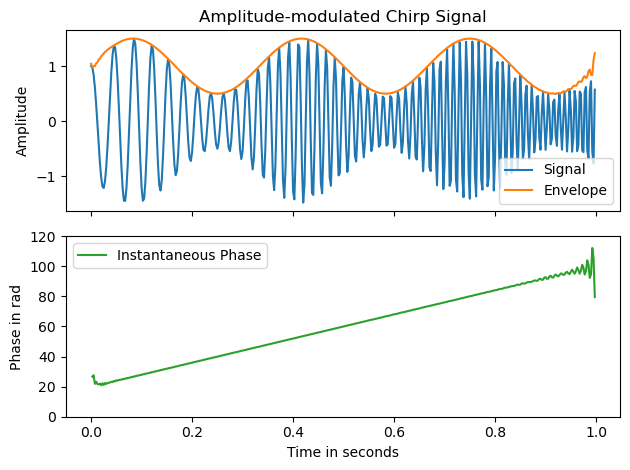

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
duration, fs = 1, 400  # 1 s signal with sampling frequency of 400 Hz
t = np.arange(int(fs*duration)) / fs  # timestamps of samples
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex='all', tight_layout=True)
ax0.set_title("Amplitude-modulated Chirp Signal")
ax0.set_ylabel("Amplitude")
ax0.plot(t, signal, label='Signal')
ax0.plot(t, amplitude_envelope, label='Envelope')
ax0.legend()
ax1.set(xlabel="Time in seconds", ylabel="Phase in rad", ylim=(0, 120))
ax1.plot(t[1:], instantaneous_frequency, 'C2-', label='Instantaneous Phase')
ax1.legend()
plt.show()


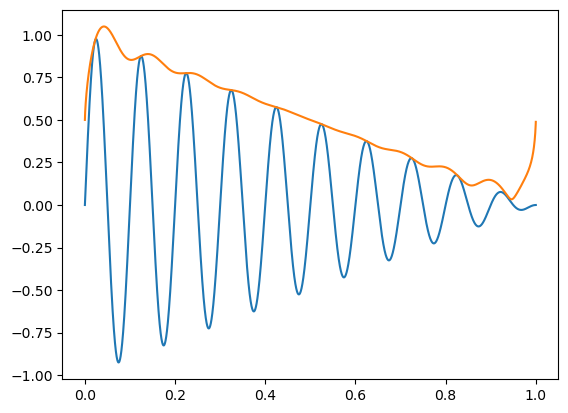

In [9]:
t = np.linspace(0,1,10000)
x = (1-t)*np.sin(2*np.pi*10*t)

hilb_x = hilbert(x)
sig = np.abs(hilb_x)

plt.plot(t,x)
plt.plot(t,sig)
plt.show()